In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree  
import statsmodels.api as sm

In [3]:
df = pd.read_csv('/Users/shruti/Desktop/Predictive Analytics/Nashville_housing_data_2013_2016_rework.csv')
df

,Unnamed: 0,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Address,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,1,SINGLE FAMILY,1/11/2013,191500,No,No,1802 STEWART PL,0.17,32000,134400,168300,1149.00000,1941,BRICK,C,2.0,1.0,0.0
1,2,SINGLE FAMILY,1/18/2013,202000,No,No,2761 ROSEDALE PL,0.11,34000,157800,191800,2090.82495,2000,BRICK/FRAME,C,3.0,2.0,1.0
2,3,SINGLE FAMILY,1/18/2013,32000,No,No,224 PEACHTREE ST,0.17,25000,243700,268700,2145.60001,1948,BRICK/FRAME,B,4.0,2.0,0.0
3,4,SINGLE FAMILY,1/23/2013,102000,No,No,316 LUTIE ST,0.34,25000,138100,164800,1969.00000,1910,FRAME,C,2.0,1.0,0.0
4,5,SINGLE FAMILY,1/4/2013,93736,No,No,2626 FOSTER AVE,0.17,25000,86100,113300,1037.00000,1945,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23537,56605,SINGLE FAMILY,10/26/2016,214000,No,No,5004 SUNSHINE DR,0.27,25000,142400,167400,2421.00000,1996,BRICK/FRAME,C,3.0,3.0,0.0
23538,56607,SINGLE FAMILY,10/28/2016,236000,No,No,4964 HICKORY WOODS E,0.23,25000,159300,184300,3117.00000,1995,BRICK/FRAME,C,3.0,3.0,0.0
23539,56614,SINGLE FAMILY,10/28/2016,466000,No,No,1625 5TH AVE N,0.15,40000,204100,256000,1637.00000,2004,FRAME,B,3.0,2.0,1.0
23540,56615,SINGLE FAMILY,10/26/2016,685000,No,No,1614 5TH AVE N,0.19,40000,295900,351600,2478.00000,2005,FRAME,B,4.0,3.0,1.0


In [138]:
df.head(10)

,Unnamed: 0,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Address,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,1,SINGLE FAMILY,1/11/2013,191500,No,No,1802 STEWART PL,0.17,32000,134400,168300,1149.00000,1941,BRICK,C,2.0,1.0,0.0
1,2,SINGLE FAMILY,1/18/2013,202000,No,No,2761 ROSEDALE PL,0.11,34000,157800,191800,2090.82495,2000,BRICK/FRAME,C,3.0,2.0,1.0
2,3,SINGLE FAMILY,1/18/2013,32000,No,No,224 PEACHTREE ST,0.17,25000,243700,268700,2145.60001,1948,BRICK/FRAME,B,4.0,2.0,0.0
3,4,SINGLE FAMILY,1/23/2013,102000,No,No,316 LUTIE ST,0.34,25000,138100,164800,1969.00000,1910,FRAME,C,2.0,1.0,0.0
4,5,SINGLE FAMILY,1/4/2013,93736,No,No,2626 FOSTER AVE,0.17,25000,86100,113300,1037.00000,1945,FRAME,C,2.0,1.0,0.0
5,7,SINGLE FAMILY,1/15/2013,44000,No,No,501 MORTON AVE,0.20,16000,68100,84300,1216.00000,1932,FRAME,D,2.0,1.0,0.0
6,8,SINGLE FAMILY,1/25/2013,49900,No,No,501 MORTON AVE,0.20,16000,68100,84300,1216.00000,1932,FRAME,D,2.0,1.0,0.0
7,9,SINGLE FAMILY,1/9/2013,25000,No,No,113 NEESE DR,0.40,25000,57100,88400,1152.00000,1945,FRAME,C,2.0,1.0,0.0
8,10,SINGLE FAMILY,1/18/2013,90000,No,No,184 WHEELER AVE,0.34,25000,80100,105100,1300.00000,1955,BRICK,C,2.0,1.0,0.0
9,11,SINGLE FAMILY,1/11/2013,72000,No,No,238 ELYSIAN FIELDS RD,0.23,21500,87900,109400,1175.00000,1968,BRICK,C,3.0,1.0,1.0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23542 entries, 0 to 23541
Data columns (total 18 columns):
Unnamed: 0                           23542 non-null int64
Land Use                             23542 non-null object
Sale Date                            23542 non-null object
Sale Price                           23542 non-null int64
Sold As Vacant                       23542 non-null object
Multiple Parcels Involved in Sale    23542 non-null object
Address                              23542 non-null object
Acreage                              23542 non-null float64
Land Value                           23542 non-null int64
Building Value                       23542 non-null int64
Total Value                          23542 non-null int64
Finished Area                        23541 non-null float64
Year Built                           23542 non-null int64
Exterior Wall                        23542 non-null object
Grade                                23542 non-null object
Bedrooms  

In [140]:
df = df.drop('Unnamed: 0', axis = 1)

In [141]:
#column names and unique values
for i in df.columns:
    print(i, ':', df[i].nunique())

Land Use : 19
Sale Date : 1047
Sale Price : 3617
Sold As Vacant : 2
Multiple Parcels Involved in Sale : 2
Address : 20308
Acreage : 395
Land Value : 826
Building Value : 3974
Total Value : 5197
Finished Area : 5677
Year Built : 125
Exterior Wall : 9
Grade : 4
Bedrooms : 10
Full Bath : 9
Half Bath : 4


In [142]:
# removing null value
for i in df.columns:
    print(i, ':', df[i].isnull().sum())

Land Use : 0
Sale Date : 0
Sale Price : 0
Sold As Vacant : 0
Multiple Parcels Involved in Sale : 0
Address : 0
Acreage : 0
Land Value : 0
Building Value : 0
Total Value : 0
Finished Area : 1
Year Built : 0
Exterior Wall : 0
Grade : 0
Bedrooms : 5
Full Bath : 3
Half Bath : 134


In [143]:
#Modify the missing values
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median()) 
df['Full Bath'] = df['Full Bath'].fillna(df['Full Bath'].median())
df['Finished Area'] = df['Finished Area'].fillna(df['Finished Area'].mean()) 
df['Half Bath'] = df['Half Bath'].fillna(df['Half Bath'].median())

In [144]:
df.describe()

,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,2.354200e+04,23542.000000,2.354200e+04,2.354200e+04,2.354200e+04,23542.000000,23542.000000,23542.000000,23542.00000,23542.000000
mean,2.504986e+05,0.428940,6.102985e+04,1.537065e+05,2.170748e+05,1821.314826,1963.132826,3.062824,1.84054,0.266885
std,2.280727e+05,0.748937,7.895385e+04,1.200548e+05,1.758392e+05,860.878475,26.118291,0.808552,0.86011,0.461976
min,1.000000e+02,0.040000,9.000000e+02,1.600000e+03,1.260000e+04,450.000000,1832.000000,0.000000,0.00000,0.000000
25%,1.250000e+05,0.190000,2.150000e+04,8.320000e+04,1.090000e+05,1229.250000,1948.000000,3.000000,1.00000,0.000000
50%,1.810000e+05,0.270000,2.800000e+04,1.156000e+05,1.523000e+05,1612.000000,1960.000000,3.000000,2.00000,0.000000
75%,3.100000e+05,0.430000,5.200000e+04,1.824000e+05,2.672000e+05,2170.979980,1980.000000,3.000000,2.00000,1.000000
max,1.075000e+07,47.500000,1.118400e+06,1.469000e+06,1.704300e+06,10788.580080,2017.000000,9.000000,8.00000,3.000000


In [145]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [146]:
df['Sale Year'] = pd.DatetimeIndex(df['Sale Date']).year
df['Sale Month'] = pd.DatetimeIndex(df['Sale Date']).month

In [147]:
df['House Age'] = df['Sale Year'] - df['Year Built']

In [148]:
df['Status'] = df['Sale Price'] - df['Total Value']

In [149]:
df['Status'].describe()

count    2.354200e+04
mean     3.342383e+04
std      1.503130e+05
min     -1.174900e+06
25%     -5.000000e+02
50%      2.810000e+04
75%      6.910000e+04
max      9.838200e+06
Name: Status, dtype: float64

In [150]:
df.head(5)

,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Address,Acreage,Land Value,Building Value,Total Value,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,House Age,Status
0,SINGLE FAMILY,2013-01-11,191500,No,No,1802 STEWART PL,0.17,32000,134400,168300,...,1941,BRICK,C,2.0,1.0,0.0,2013,1,72,23200
1,SINGLE FAMILY,2013-01-18,202000,No,No,2761 ROSEDALE PL,0.11,34000,157800,191800,...,2000,BRICK/FRAME,C,3.0,2.0,1.0,2013,1,13,10200
2,SINGLE FAMILY,2013-01-18,32000,No,No,224 PEACHTREE ST,0.17,25000,243700,268700,...,1948,BRICK/FRAME,B,4.0,2.0,0.0,2013,1,65,-236700
3,SINGLE FAMILY,2013-01-23,102000,No,No,316 LUTIE ST,0.34,25000,138100,164800,...,1910,FRAME,C,2.0,1.0,0.0,2013,1,103,-62800
4,SINGLE FAMILY,2013-01-04,93736,No,No,2626 FOSTER AVE,0.17,25000,86100,113300,...,1945,FRAME,C,2.0,1.0,0.0,2013,1,68,-19564


#### Analysis

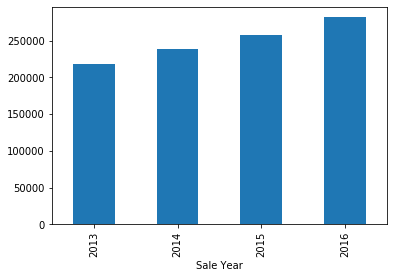

In [151]:
df.groupby(['Sale Year'])['Sale Price'].mean().plot.bar()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23542 entries, 0 to 23541
Data columns (total 21 columns):
Land Use                             23542 non-null object
Sale Date                            23542 non-null datetime64[ns]
Sale Price                           23542 non-null int64
Sold As Vacant                       23542 non-null object
Multiple Parcels Involved in Sale    23542 non-null object
Address                              23542 non-null object
Acreage                              23542 non-null float64
Land Value                           23542 non-null int64
Building Value                       23542 non-null int64
Total Value                          23542 non-null int64
Finished Area                        23542 non-null float64
Year Built                           23542 non-null int64
Exterior Wall                        23542 non-null object
Grade                                23542 non-null object
Bedrooms                             23542 non-null float64


In [153]:
df_1 = df.copy()

#### Dummy Variables

In [154]:
df_1 = pd.get_dummies(df_1, columns = ['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Exterior Wall', 'Grade'])

In [155]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23542 entries, 0 to 23541
Data columns (total 52 columns):
Sale Date                                    23542 non-null datetime64[ns]
Sale Price                                   23542 non-null int64
Address                                      23542 non-null object
Acreage                                      23542 non-null float64
Land Value                                   23542 non-null int64
Building Value                               23542 non-null int64
Total Value                                  23542 non-null int64
Finished Area                                23542 non-null float64
Year Built                                   23542 non-null int64
Bedrooms                                     23542 non-null float64
Full Bath                                    23542 non-null float64
Half Bath                                    23542 non-null float64
Sale Year                                    23542 non-null int64
Sale Month   

In [156]:
df_1 = df_1.drop('Address', axis = 1)

In [157]:
df_1.head(5)

,Sale Date,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,...,Exterior Wall_FRAME,Exterior Wall_FRAME/STONE,Exterior Wall_LOG,Exterior Wall_METAL,Exterior Wall_STONE,Exterior Wall_STUCCO,Grade_A,Grade_B,Grade_C,Grade_D
0,2013-01-11,191500,0.17,32000,134400,168300,1149.00000,1941,2.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,2013-01-18,202000,0.11,34000,157800,191800,2090.82495,2000,3.0,2.0,...,0,0,0,0,0,0,0,0,1,0
2,2013-01-18,32000,0.17,25000,243700,268700,2145.60001,1948,4.0,2.0,...,0,0,0,0,0,0,0,1,0,0
3,2013-01-23,102000,0.34,25000,138100,164800,1969.00000,1910,2.0,1.0,...,1,0,0,0,0,0,0,0,1,0
4,2013-01-04,93736,0.17,25000,86100,113300,1037.00000,1945,2.0,1.0,...,1,0,0,0,0,0,0,0,1,0


In [158]:
df_1 = df_1.drop(columns=['Sale Date', 'Sale Price'], axis = 1)

#### Scaling of data

In [159]:
status_mean = df_1['Status'].mean()

In [160]:
StandardScaler_X = StandardScaler()
StandardScaler_y = StandardScaler()

In [161]:
df_1.loc[df_1['Status'] < status_mean, ('Status')] = 0
df_1.loc[df_1['Status'] >= status_mean, ('Status')] = 1

In [162]:
df_1['Status'].value_counts()

0    12798
1    10744
Name: Status, dtype: int64

In [164]:
y = df_1['Status']
X = df_1.drop('Status', axis = 1)

In [165]:
X = StandardScaler_X.fit_transform(X)

In [166]:
y = y.values.reshape(1,-1)

In [167]:
y = np.reshape(y,(-1,1))

In [168]:
y.shape

(23542, 1)

#### Logistic Regression 

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [170]:
X_train = pd.DataFrame(X_train)

In [171]:
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [179]:
logistic_regression = LogisticRegression()

In [180]:
model_logistic = logistic_regression.fit(X_train, y_train)

C:\Users\shiva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shiva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [174]:
y_pred = model_logistic.predict(X_test)

In [182]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
print('Accuracy: '+str(round(accuracy_score(y_pred, y_test)*100,2))+'%')
print('Precision: '+str(round(precision_score(y_pred, y_test)*100,2))+'%')
print('Recall: '+str(round(recall_score(y_pred, y_test)*100,2))+'%')
print('MSE: '+str(round(mean_squared_error(y_pred, y_test)*100,2))+'%')

Accuracy: 72.9%
Precision: 69.06%
Recall: 70.51%
MSE: 27.1%


In [183]:
confusion_matrix(y_test, y_pred)

array([[1960,  616],
       [ 660, 1473]], dtype=int64)

In [184]:
glm_1 = sm.GLM(y_train, X_train, family=sm.families.Poisson(link=sm.families.links.log))

C:\Users\shiva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [185]:
res = glm_1.fit()

In [186]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                18833
Model:                            GLM   Df Residuals:                    18791
Model Family:                 Poisson   Df Model:                           41
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.0429e+60
Date:                Sun, 17 Oct 2021   Deviance:                   1.6086e+61
Time:                        23:35:28   Pearson chi2:                 8.04e+60
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0015   5.07e-33  -2.94e+29      0.000      -0.001      -0.001
1             -0.0385    2.8e-32  -1.37e+30      0.000      -0.038      -0.038
2             -0.0577    5.3e-32  -1.09e+30      0.000      -0.058      -0.058
3             -0.0582   5.01e-32  -1.16e+30      0.000      -0.058      -0.058
4             -0.0562   4.82e-32  -1.16e+30      0.000      -0.056      -0.056
5              0.0406   4.85e-33   8.37e+30      0.000       0.041       0.041
6             -0.0014   2.11e-36  -6.52e+32      0.000      -0.001      -0.001
7             -0.0676   7.35e-32  -9.19e+29      0.000      -0.068      -0.068
8             -0.0103   1.57e-35  -6.52e+32      0.000      -0.010      -0.010
9              0.0635   5.84e-32   1.09e+30      0.000       0.063       0.063
10             0.1067   1.02e-31   1.04e+30      0.000       0.107       0.107
11            -0.0379   2.42e-33  -1.57e+31      0.000      -0.038      -0.038
12            -0.0003   5.32e-37  -6.52e+32      0.000      -0.000      -0.000
13            -0.0001   1.77e-37  -6.52e+32      0.000      -0.000      -0.000
14            -0.0004   6.64e-37  -6.52e+32      0.000      -0.000      -0.000
15            -0.0041   6.27e-36  -6.52e+32      0.000      -0.004      -0.004
16            -0.0002   2.51e-37  -6.52e+32      0.000      -0.000      -0.000
17            -0.0002   3.55e-37  -6.52e+32      0.000      -0.000      -0.000
18            -0.0001   1.77e-37  -6.52e+32      0.000      -0.000      -0.000
19             1.5716   2.41e-33   6.52e+32      0.000       1.572       1.572
20            -0.0002   2.51e-37  -6.52e+32      0.000      -0.000      -0.000
21            -0.0002   2.51e-37  -6.52e+32      0.000      -0.000      -0.000
22            -0.0003   3.96e-37  -6.52e+32      0.000      -0.000      -0.000
23            -0.0007   1.03e-36  -6.52e+32      0.000      -0.001      -0.001
24            -0.0007   1.08e-36  -6.52e+32      0.000      -0.001      -0.001
25            -0.0494   7.57e-35  -6.52e+32      0.000      -0.049      -0.049
26            -0.0004   5.88e-37  -6.52e+32      0.000      -0.000      -0.000
27            -0.0010   1.56e-36  -6.52e+32      0.000      -0.001      -0.001
28            -0.0017   2.58e-36  -6.52e+32      0.000      -0.002      -0.002
29            -0.0018   2.81e-36  -6.52e+32      0.000      -0.002      -0.002
30            -0.0034   5.25e-36  -6.52e+32      0.000      -0.003      -0.003
31             0.0024   3.68e-36   6.52e+32      0.000       0.002       0.002
32            -0.0024   3.68e-36  -6.52e+32      0.000      -0.002      -0.002
33             0.0029   4.42e-36   6.52e+32      0.000       0.003       0.003
34            -0.0029   4.42e-36  -6.52e+32      0.000      -0.003      -0.003
35            -0.0174   2.67e-35  -6.52e+32      0.000      -0.017      -0.017
36

In [187]:
p_value = pd.DataFrame(res.pvalues, columns = ['p_value'])
coef = pd.DataFrame(res.params, columns = ['coef'])
p_coef = pd.concat([coef,p_value], axis = 1)

In [188]:
print(p_coef[p_coef['p_value'] < 0.05].sort_values('coef', ascending = False))

        coef  p_value
19  1.571645      0.0
10  0.106730      0.0
9   0.063453      0.0
5   0.040582      0.0
38  0.023021      0.0
46  0.010702      0.0
33  0.002882      0.0
31  0.002397      0.0
18 -0.000116      0.0
13 -0.000116      0.0
16 -0.000164      0.0
21 -0.000164      0.0
20 -0.000164      0.0
17 -0.000231      0.0
22 -0.000259      0.0
12 -0.000347      0.0
26 -0.000384      0.0
41 -0.000384      0.0
14 -0.000433      0.0
40 -0.000448      0.0
23 -0.000675      0.0
24 -0.000704      0.0
27 -0.001016      0.0
39 -0.001123      0.0
37 -0.001165      0.0
43 -0.001254      0.0
6  -0.001379      0.0
0  -0.001488      0.0
28 -0.001683      0.0
29 -0.001831      0.0
42 -0.002079      0.0
32 -0.002397      0.0
44 -0.002864      0.0
34 -0.002882      0.0
30 -0.003423      0.0
15 -0.004088      0.0
47 -0.005383      0.0
36 -0.006206      0.0
45 -0.007659      0.0
8  -0.010250      0.0
35 -0.017407      0.0
11 -0.037931      0.0
1  -0.038487      0.0
25 -0.049378      0.0
4  -0.0561

In [189]:
y_pred_GLM = res.predict(X_test)

In [190]:
predictions_nominal = [ 0 if x < 0.5 else 1 for x in y_pred_GLM]

In [191]:
accuracy_score(y_test, predictions_nominal)

0.4470163516670206

#### Decision Tree

In [192]:
decision_tree = DecisionTreeClassifier(random_state = 100)

In [193]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [194]:
decision_tree.score(X_test, y_test)

0.6882565300488427

In [195]:
y_pred_dc = decision_tree.predict(X_test)

In [196]:
confusion_matrix(y_test, y_pred_dc)

array([[1847,  729],
       [ 739, 1394]], dtype=int64)

In [197]:
feature_names = X_train.columns
target_names = df['Status'].unique().tolist()

In [ ]:
decision_tree = tree.export_graphviz(decision_tree, out_file = 'tree.dot', feature_names = X.columns)

In [199]:
decision_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

#### Random Forest Model 

In [87]:
model_RF = RandomForestClassifier(n_estimators=100, criterion= 'entropy', random_state = 0)

In [88]:
model_RF.fit(X_train, y_train)

C:\Users\shiva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [89]:
model_RF.score(X_test, y_test)

0.7509025270758123

In [92]:
y_pred_RF = model_RF.predict(X_test)

In [93]:
confusion_matrix(y_test, y_pred_RF)

array([[1995,  581],
       [ 592, 1541]], dtype=int64)

#### Gradient Boosting Model

In [94]:
boosting_classifier = GradientBoostingClassifier()

In [95]:
boosting_classifier.fit(X_train, y_train)

C:\Users\shiva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [96]:
boosting_classifier.score(X_test, y_test)

0.7506901677638564

In [97]:
y_pred_gbm = boosting_classifier.predict(X_test)

In [98]:
confusion_matrix(y_pred_gbm, y_test)

array([[1982,  580],
       [ 594, 1553]], dtype=int64)